In [1]:
import sys
import math, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpig
#from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import linalg as LA
import numpy as np

In [2]:
def read_cov(covfile):
    data = np.genfromtxt(covfile)
    ndata = int(np.max(data[:,0]))+1

    print('ndata=%d'%(ndata))

    cov = np.zeros((ndata,ndata))
#     cor = np.zeros((ndata,ndata))
    for i in range(0,data.shape[0]):
            cov[int(data[i,0]),int(data[i,1])] =data[i,8] +data[i,9]
            cov[int(data[i,1]),int(data[i,0])] =data[i,8] +data[i,9]
    return cov, ndata

In [3]:
def test_cov(cov):
    a = np.sort(LA.eigvals(cov))
    print('eigenvalues: ', a[:])
    # print(np.linalg.cholesky(covcut))
    # print "min+max eigenvalues covcut:"
    #print b
    print('min, max eigenvalues: ', np.min(a), np.max(a))
    ind = np.where(a < 0)
    if (np.min(a) <0): 
        print('negative eigens: ', a[ind])
    else:
        print('Postive Definite!')

In [4]:
def inv_cov_output(cov, n, outfile):
    invcov = LA.inv(cov)
    narr = np.arange(n)
    col1 = np.repeat(narr, n)
    col2 = np.tile(narr, n)
    np.savetxt(outfile, np.c_[col1, col2, invcov.flatten()], fmt='%d %d %le')
    print('inv cov saved!')
    return invcov

In [5]:
def get_Nggl(ndata_6x2pt,nshear,nsource,nlens,ntheta):
    nggl = ndata_6x2pt / ntheta - nshear - nlens - nlens - nsource - 1
    return nggl

In [6]:
def plot_cov(cov, figsize):
    plt.figure(figsize=(figsize,figsize))
    plt.imshow(np.log10(abs(cov)))
    plt.show()

In [7]:
def plot_corr(cov, figsize):
    cmap = 'seismic'
    ndim = cov.shape[0]
    corr = np.zeros((ndim,ndim))
    for i in range(ndim):
        for j in range(ndim):
            corr[i][j] = cov[i][j]/np.sqrt(cov[i][i]*cov[j][j])
    fig = plt.figure(figsize=(figsize,figsize))
    im = plt.imshow(corr, cmap=cmap, vmin=-1,vmax=1)
    fig.colorbar(im, orientation='vertical')
    plt.tight_layout()
    plt.show()

In [8]:
def save_cov_npy(cov, npyname):
    np.save(npyname, cov)
    print("npy cov saved!")

In [9]:
nsource = 10
nshear = nsource*(nsource+1)/2
ntheta = 15
nlens = 10

In [10]:
cov_Y6_6x2pt, ndata_Y6_6x2pt = read_cov('cov_lsstxsoy6')
nggl = get_Nggl(ndata_Y6_6x2pt,nshear,nsource,nlens,ntheta)
print("nggl=", nggl)

ndata=2070
nggl= 52.0


In [11]:
save_cov_npy(cov_Y6_6x2pt, 'cov_LSSTxSO_Y6_6x2pt.npy')

npy cov saved!


In [11]:
test_cov(cov_Y6_6x2pt)

eigenvalues:  [3.51842912e-24 3.60804046e-24 3.61347496e-24 ... 9.31564481e-11
 1.02237103e-10 1.10438368e-10]
min, max eigenvalues:  3.518429119483931e-24 1.1043836762209527e-10
Postive Definite!


In [13]:
invcov_Y6_6x2pt = inv_cov_output(cov_Y6_6x2pt, ndata_Y6_6x2pt, 'invcov_Y6_6x2pt')

inv cov saved!


In [15]:
n3x2pt = int(ndata_Y6_6x2pt/ntheta-(nsource+nlens+1))
print('n3x2pt = ', n3x2pt)
save_cov_npy(cov_Y6_6x2pt[:n3x2pt*ntheta,:n3x2pt*ntheta], 'cov_LSSTxSO_Y6_3x2pt.npy')
invcov_Y6_3x2pt = inv_cov_output(cov_Y6_6x2pt[:n3x2pt*ntheta,:n3x2pt*ntheta], n3x2pt*ntheta, 'invcov_Y6_3x2pt')

n3x2pt =  117
npy cov saved!
inv cov saved!


In [12]:
n5x2pt = int(ndata_Y6_6x2pt/ntheta-1)
print('n5x2pt = ', n5x2pt)
# save_cov_npy(cov_Y6_6x2pt[:n5x2pt*ntheta,:n5x2pt*ntheta], 'cov_LSSTxSO_Y6_5x2pt.npy')
invcov_Y6_5x2pt = inv_cov_output(cov_Y6_6x2pt[:n5x2pt*ntheta,:n5x2pt*ntheta], n5x2pt*ntheta, 'invcov_Y6_5x2pt')

n5x2pt =  137
inv cov saved!


<ipython-input-6-103adf963930>:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(cov)))


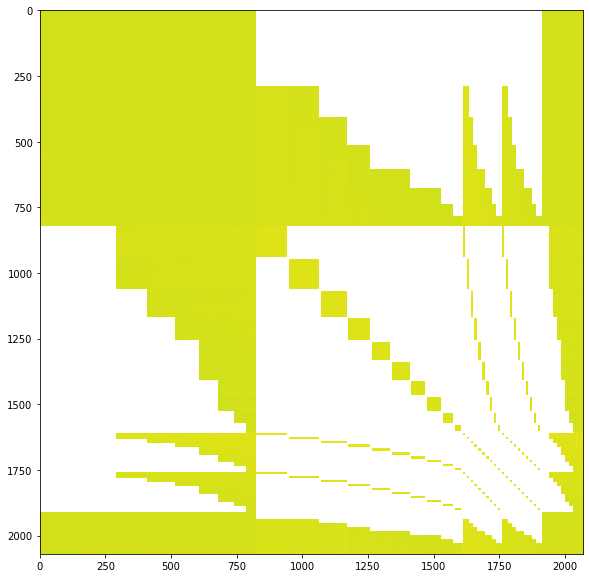

In [16]:
plot_cov(cov_Y6_6x2pt, 10)

ndata=1965
npy cov saved!
nggl= 45.0
eigenvalues:  [2.10722147e-23 2.11029009e-23 2.12162736e-23 ... 1.60587091e-10
 1.87278432e-10 1.92043273e-10]
min, max eigenvalues:  2.1072214655046477e-23 1.9204327344201193e-10
Postive Definite!


<ipython-input-6-103adf963930>:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(cov)))


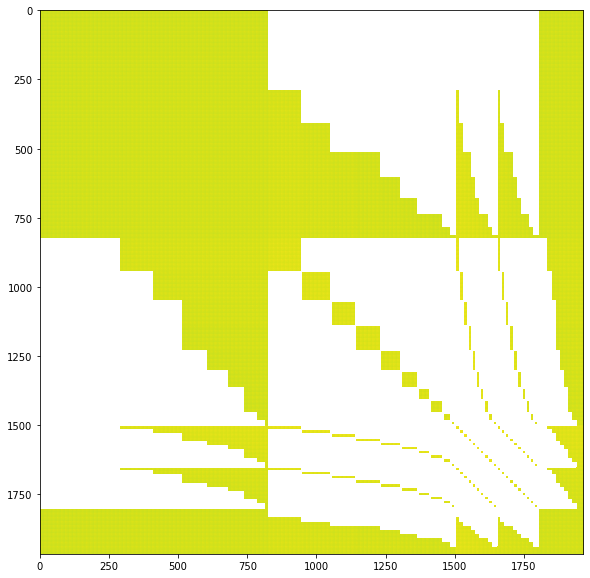

In [17]:
cov_Y1_6x2pt, ndata_Y1_6x2pt = read_cov('cov_lsstxsoy1')
save_cov_npy(cov_Y1_6x2pt, 'cov_LSSTxSO_Y1_6x2pt.npy')
nggl = get_Nggl(ndata_Y1_6x2pt,nshear,nsource,nlens,ntheta)
print("nggl=", nggl)
test_cov(cov_Y1_6x2pt)
plot_cov(cov_Y1_6x2pt, 10)

In [18]:
invcov_Y1_6x2pt = inv_cov_output(cov_Y1_6x2pt, ndata_Y1_6x2pt, 'invcov_Y1_6x2pt')

inv cov saved!


In [20]:
n3x2pt = int(ndata_Y1_6x2pt/ntheta-(nsource+nlens+1))
print('n3x2pt = ', n3x2pt)
save_cov_npy(cov_Y1_6x2pt[:n3x2pt*ntheta,:n3x2pt*ntheta], 'cov_LSSTxSO_Y1_3x2pt.npy')
invcov_Y1_3x2pt = inv_cov_output(cov_Y1_6x2pt[:n3x2pt*ntheta,:n3x2pt*ntheta], n3x2pt*ntheta, 'invcov_Y1_3x2pt')

n3x2pt =  110
npy cov saved!
inv cov saved!


ndata=1965
npy cov saved!
nggl= 45.0
eigenvalues:  [-1.45784521e-20 -2.17380394e-21  2.10815646e-23 ...  1.13649863e-10
  1.27103533e-10  1.52278792e-10]
min, max eigenvalues:  -1.457845210498381e-20 1.5227879245447396e-10
negative eigens:  [-1.45784521e-20 -2.17380394e-21]


<ipython-input-6-103adf963930>:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(cov)))


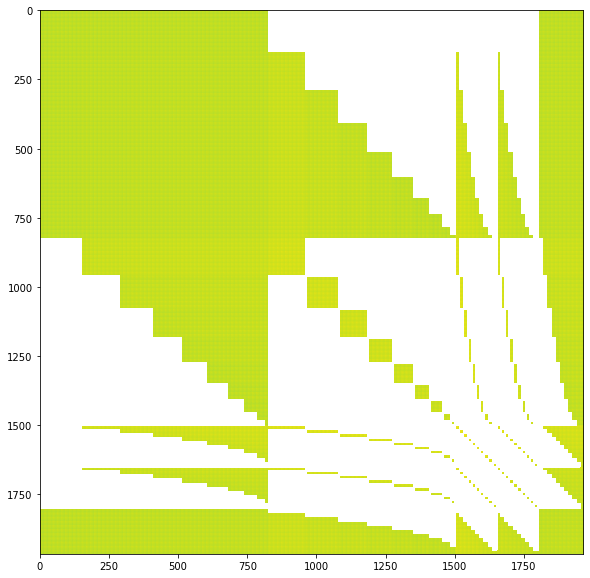

In [22]:
cov_Y1_6x2pt_1sample, ndata_Y1_6x2pt_1sample = read_cov('cov_lsstxsoy1_1sample')
save_cov_npy(cov_Y1_6x2pt_1sample, 'cov_LSSTxSO_Y1_1sample_6x2pt.npy')
nggl = get_Nggl(ndata_Y1_6x2pt_1sample,nshear,nsource,nlens,ntheta)
print("nggl=", nggl)
test_cov(cov_Y1_6x2pt_1sample)
plot_cov(cov_Y1_6x2pt_1sample, 10)

In [25]:
# invcov_Y1_6x2pt_1sample = inv_cov_output(cov_Y1_6x2pt_1sample, ndata_Y1_6x2pt_1sample, 'invcov_Y1_6x2pt_1sample')

In [24]:
n3x2pt = int(ndata_Y1_6x2pt_1sample/ntheta-(nsource+nlens+1))
print('n3x2pt = ', n3x2pt)
save_cov_npy(cov_Y1_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta], 'cov_LSSTxSO_Y1_1sample_3x2pt.npy')
invcov_Y1_3x2pt_1sample = inv_cov_output(cov_Y1_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta], n3x2pt*ntheta, 'invcov_Y1_3x2pt_1sample')

n3x2pt =  110
npy cov saved!
inv cov saved!


In [27]:
test_cov(cov_Y1_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta])

eigenvalues:  [-2.16421969e-21  2.10813984e-23  2.10943675e-23 ...  1.13627243e-10
  1.27070804e-10  1.52249765e-10]
min, max eigenvalues:  -2.1642196912674094e-21 1.522497645340882e-10
negative eigens:  [-2.16421969e-21]


ndata=1965
npy cov saved!
nggl= 45.0
eigenvalues:  [-7.23712002e-19 -2.77718063e-19 -5.44049768e-20 ...  4.49380376e-11
  5.63341588e-11  6.96127691e-11]
min, max eigenvalues:  -7.237120019642953e-19 6.961276906574222e-11
negative eigens:  [-7.23712002e-19 -2.77718063e-19 -5.44049768e-20 -1.95205072e-20
 -4.37270207e-21]


<ipython-input-6-103adf963930>:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(cov)))


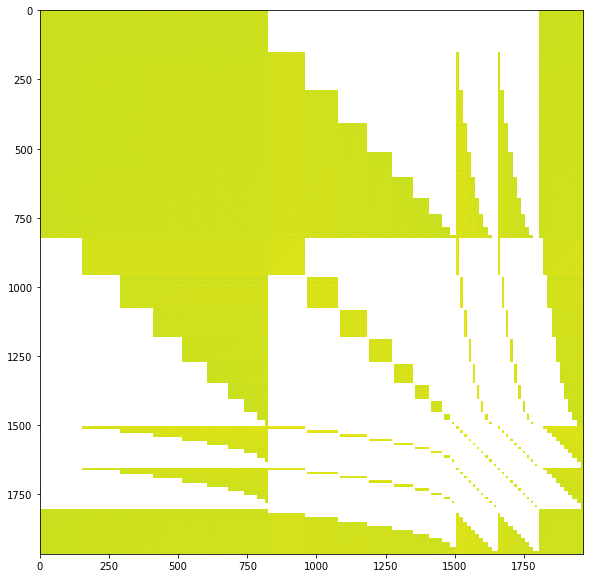

In [26]:
cov_Y6_6x2pt_1sample, ndata_Y6_6x2pt_1sample = read_cov('cov_lsstxsoy6_1sample')
save_cov_npy(cov_Y6_6x2pt_1sample, 'cov_LSSTxSO_Y6_1sample_6x2pt.npy')
nggl = get_Nggl(ndata_Y6_6x2pt_1sample,nshear,nsource,nlens,ntheta)
print( "nggl=", nggl)
test_cov(cov_Y6_6x2pt_1sample)
plot_cov(cov_Y6_6x2pt_1sample, 10)

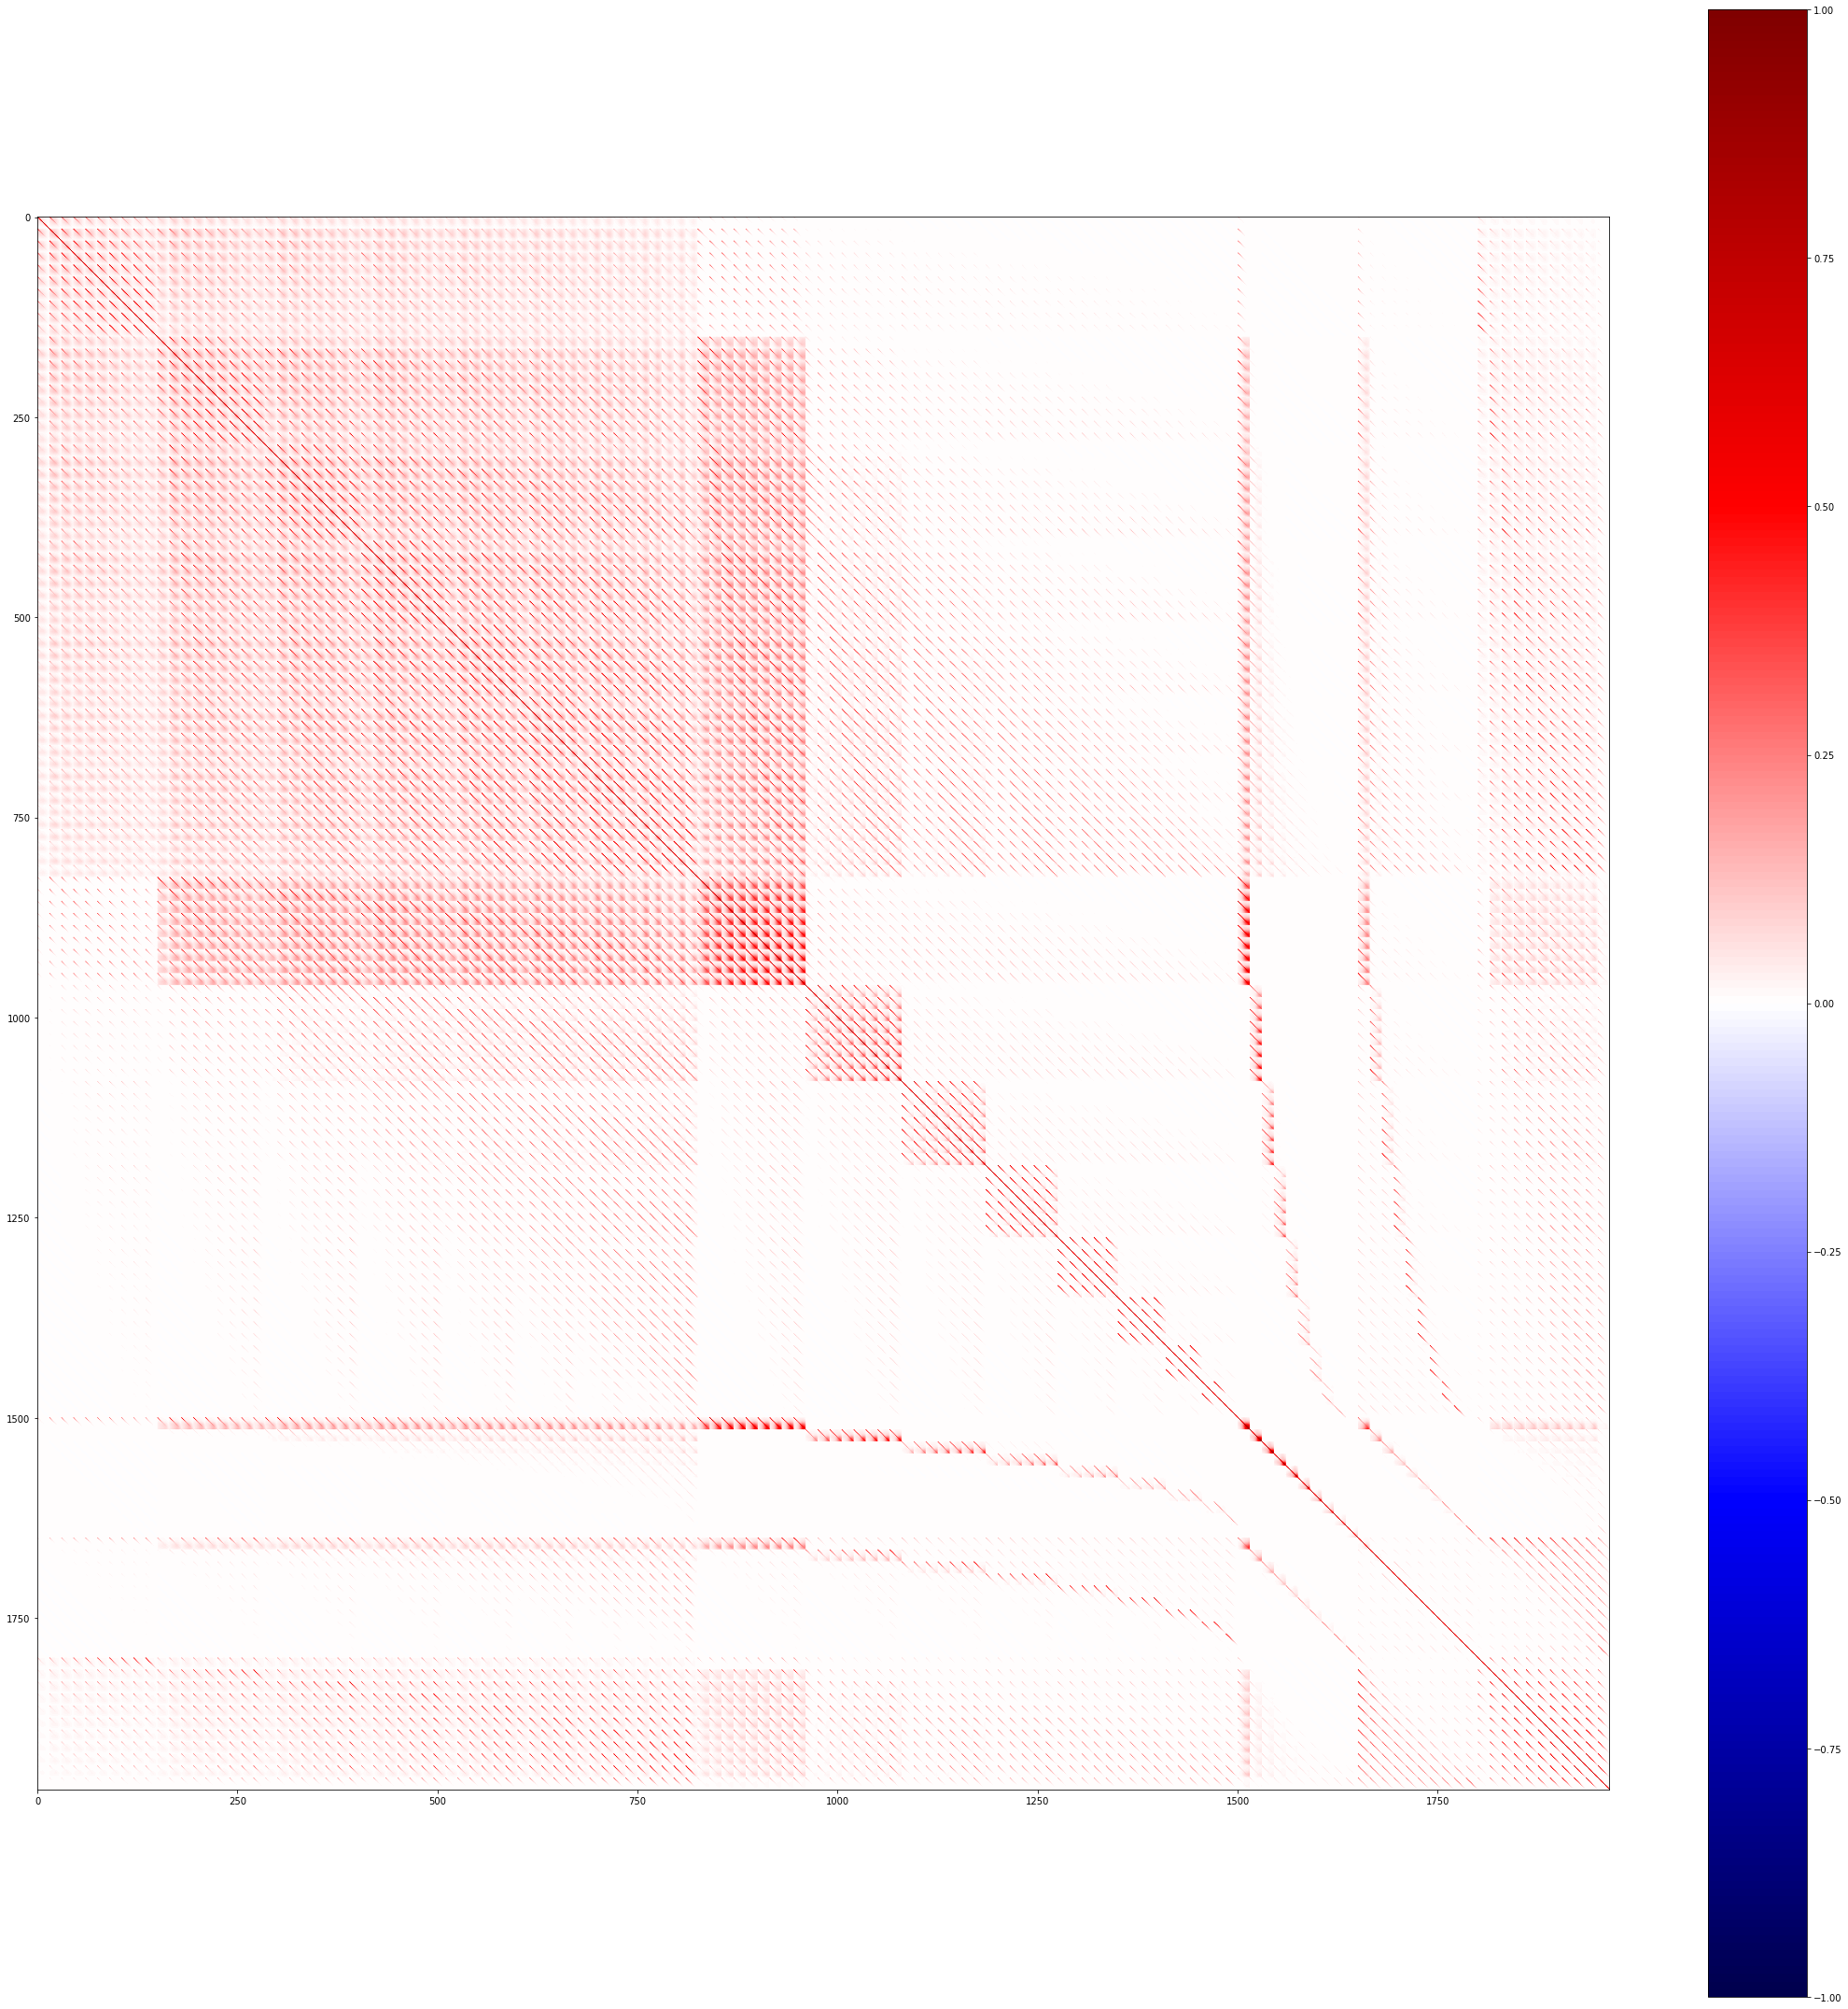

In [30]:
plot_corr(cov_Y6_6x2pt_1sample, 30)

In [53]:
# select_ind = np.hstack((np.arange(825),np.arange(840,1650),np.arange(1665,1965)))
select_ind = np.hstack((np.arange(825),np.arange(960,1650),np.arange(1665,1965)))
# select_ind = np.hstack((np.arange(1650),np.arange(1665,1965)))
print(select_ind)
test_cov(cov_Y6_6x2pt_1sample[select_ind][:,select_ind])

[   0    1    2 ... 1962 1963 1964]
eigenvalues:  [-4.43983170e-20 -5.47287069e-21  3.60668398e-24 ...  4.49380376e-11
  5.63062333e-11  6.96127681e-11]
min, max eigenvalues:  -4.439831695897955e-20 6.961276807947396e-11
negative eigens:  [-4.43983170e-20 -5.47287069e-21]


In [52]:
# select_ind = np.hstack((np.arange(825),np.arange(960,1650),np.arange(1665,1965)))
# select_ind = np.hstack((np.arange(1650),np.arange(1665,1965)))
select_ind = np.hstack((np.arange(825),np.arange(960,1965)))
print(select_ind)
test_cov(cov_Y1_6x2pt_1sample[select_ind][:,select_ind])

[   0    1    2 ... 1962 1963 1964]
eigenvalues:  [-4.91043008e-22  2.10737962e-23  2.11039752e-23 ...  1.13649863e-10
  1.26948508e-10  1.52278792e-10]
min, max eigenvalues:  -4.910430082847645e-22 1.5227879210359485e-10
negative eigens:  [-4.91043008e-22]


In [14]:
# invcov_Y6_6x2pt_1sample = inv_cov_output(cov_Y6_6x2pt_1sample, ndata_Y6_6x2pt_1sample, 'invcov_Y6_6x2pt_1sample')

inv cov saved!


In [28]:
n3x2pt = int(ndata_Y6_6x2pt_1sample/ntheta-(nsource+nlens+1))
print('n3x2pt = ', n3x2pt)
test_cov(cov_Y6_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta])
save_cov_npy(cov_Y6_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta], 'cov_LSSTxSO_Y6_1sample_3x2pt.npy')
invcov_Y6_3x2pt_1sample = inv_cov_output(cov_Y6_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta], n3x2pt*ntheta, 'invcov_Y6_3x2pt_1sample')

n3x2pt =  110
eigenvalues:  [-2.37963596e-20  3.60750010e-24  3.61241666e-24 ...  4.49239048e-11
  5.63107573e-11  6.95921021e-11]
min, max eigenvalues:  -2.3796359643153676e-20 6.959210213872002e-11
negative eigens:  [-2.37963596e-20]
npy cov saved!
inv cov saved!


In [76]:
cor = np.zeros((ndata,ndata))
for i in range(0,ndata):
	for j in range(0,ndata):
		cor[i,j] = cov[i,j]/math.sqrt(cov[i,i]*cov[j,j])

In [77]:
b = np.sort(LA.eigvals(cor))
print b[:]
print np.min(b), np.max(b)
ind = np.where(b < 0)
if (np.min(b) <0): 
	print b[ind]

[1.31077993e-03 1.34326211e-03 1.69305584e-03 ... 4.53976995e+01
 4.87886156e+01 5.90289368e+01]
0.0013107799320186326 59.02893679257713


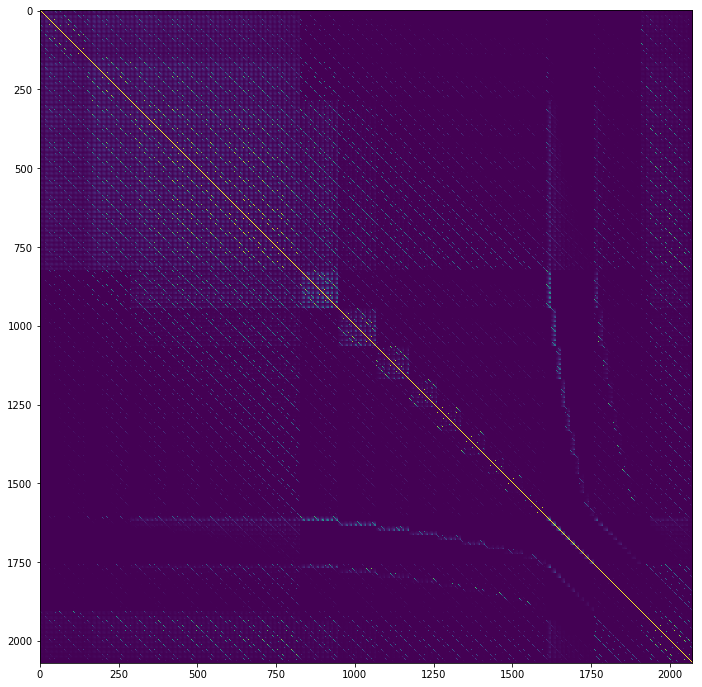

In [78]:
plt.figure(figsize=(12,12))
plt.imshow(cor)
plt.show()